In [ ]:
#importing the necessary libraries
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import random
import seaborn as sn
from sklearn.decomposition import PCA

In [ ]:
data1 = datasets.load_iris()  #load flower recognition dataset
data = pd.DataFrame(data= np.c_[data1['data'], data1['target']], columns= data1['feature_names'] + ['target'])

In [ ]:
data.head()  #Display first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
data1.target_names  #Display classes

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
data.groupby(['target']).count()    #Count each unique value of target column

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0.0,50,50,50,50
1.0,50,50,50,50
2.0,50,50,50,50


In [ ]:
X = data.iloc[:, 0:4].values
#Calculate mean and standard deviation
print(np.mean(X))
print(np.std(X))

3.4644999999999997
1.9738430577598278


In [ ]:
#Feature Scaling and Data standarization
X_std = StandardScaler().fit_transform(X)
print(np.mean(X_std))
print(np.std(X_std))
X_std.shape

-1.4684549872375404e-15
1.0


(150, 4)

In [ ]:
#Calculate covariance
X_std_cov = np.cov(X_std.T)
X_std_cov

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [ ]:
#Calculate eigen values and eigen vectors
eigenvalues, eigenvectors = np.linalg.eig(X_std_cov)
eigenvalues, eigenvectors

(array([2.93808505, 0.9201649 , 0.14774182, 0.02085386]),
 array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
        [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
        [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
        [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]]))

In [ ]:
#Calculate proportion of variance
for i, value in enumerate(eigenvalues):
    print(f"Proportion of Variance - {i + 1}: {(value / np.sum(eigenvalues)) * 100:.2f}")

Proportion of Variance - 1: 72.96
Proportion of Variance - 2: 22.85
Proportion of Variance - 3: 3.67
Proportion of Variance - 4: 0.52


In [ ]:
#Extract subset of eigen vectors
transform_component = eigenvectors.T[1:3]
transform_component.shape
transform_component

array([[-0.37741762, -0.92329566, -0.02449161, -0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274]])

In [ ]:
#Perform matrix multiplication
new_transformed = X_std @ transform_component.T
new_transformed.shape

(150, 2)

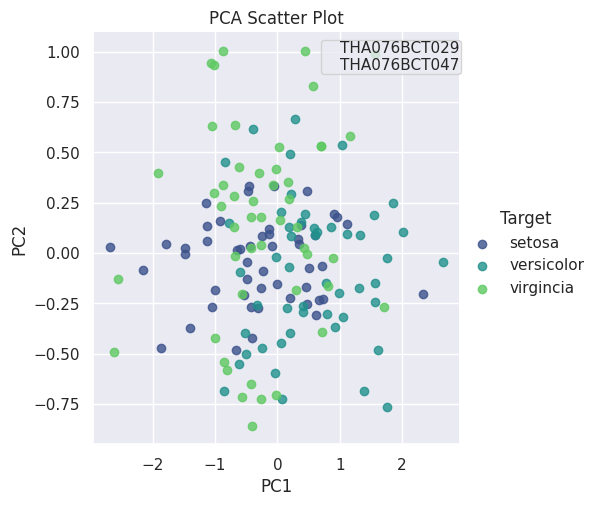

In [ ]:
#For 2 component
df = pd.DataFrame(data=new_transformed, columns=['PC1', 'PC2'])
y = pd.Series(data1.target)
y = y.replace(0, 'setosa')
y = y.replace(1, 'versicolor')
y = y.replace(2, 'virgincia')
df['Target'] = y

sn.set(style='darkgrid')  # Set the style to 'darkgrid' for a similar appearance

legend_handles = [
    plt.Line2D([], [], color='black', marker='o', markersize=10, label='THA076BCT029\nTHA076BCT047',alpha = 0), # Remove the scatterplot marker from the legend
]
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(0.6, 1.0), ncol=len(legend_handles), handlelength=0.4, borderpad=0.07)

sn.lmplot(x='PC1', y='PC2', data=df, hue='Target', fit_reg = False, palette='viridis', legend='full')  # Use scatterplot and add 'style' parameter
plt.title('PCA Scatter Plot')
plt.show()

In [ ]:
#Trying differebt combination
transform_component = eigenvectors.T[[0,2]]
transform_component.shape
new_transformed = X_std @ transform_component.T
new_transformed.shape

(150, 2)

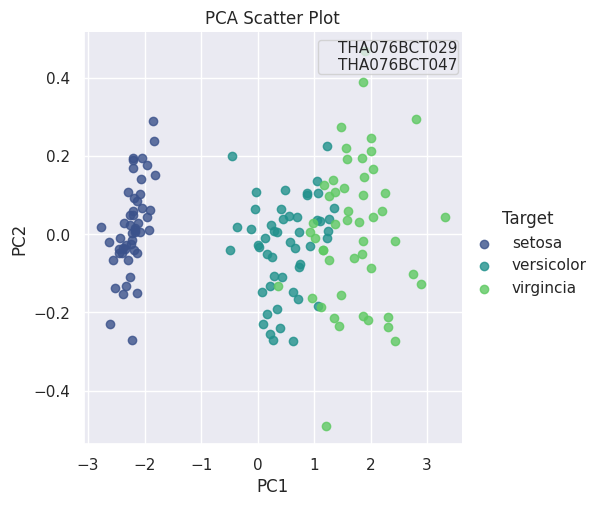

In [ ]:
#For 2 component
df = pd.DataFrame(data=new_transformed, columns=['PC1', 'PC2'])
y = pd.Series(data1.target)
y = y.replace(0, 'setosa')
y = y.replace(1, 'versicolor')
y = y.replace(2, 'virgincia')
df['Target'] = y

sn.set(style='darkgrid')  # Set the style to 'darkgrid' for a similar appearance

legend_handles = [
    plt.Line2D([], [], color='black', marker='o', markersize=10, label='THA076BCT029\nTHA076BCT047',alpha = 0), # Remove the scatterplot marker from the legend
]

sn.lmplot(x='PC1', y='PC2', data=df, hue='Target', fit_reg = False, palette='viridis', legend='full')  # Use scatterplot and add 'style' parameter
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(0.6, 1.0), ncol=len(legend_handles), handlelength=0.4, borderpad=0.07)
plt.title('PCA Scatter Plot')
plt.show()

In [ ]:
#Trying different combination
transform_component = eigenvectors.T[[0,3]]
transform_component.shape
new_transformed = X_std @ transform_component.T
new_transformed.shape

(150, 2)

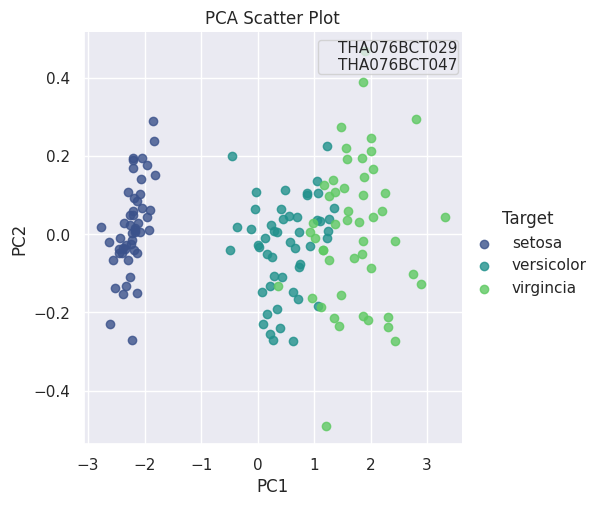

In [ ]:
#For 2 component
df = pd.DataFrame(data=new_transformed, columns=['PC1', 'PC2'])
y = pd.Series(data1.target)
y = y.replace(0, 'setosa')
y = y.replace(1, 'versicolor')
y = y.replace(2, 'virgincia')
df['Target'] = y

sn.set(style='darkgrid')  # Set the style to 'darkgrid' for a similar appearance

legend_handles = [
    plt.Line2D([], [], color='black', marker='o', markersize=10, label='THA076BCT029\nTHA076BCT047',alpha = 0), # Remove the scatterplot marker from the legend
]

sn.lmplot(x='PC1', y='PC2', data=df, hue='Target', fit_reg = False, palette='viridis', legend='full')  # Use scatterplot and add 'style' parameter
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(0.6, 1.0), ncol=len(legend_handles), handlelength=0.4, borderpad=0.07)
plt.title('PCA Scatter Plot')
plt.show()

In [ ]:
#Trying different combination
transform_component = eigenvectors.T[[2,3]]
transform_component.shape
new_transformed = X_std @ transform_component.T
new_transformed.shape

(150, 2)

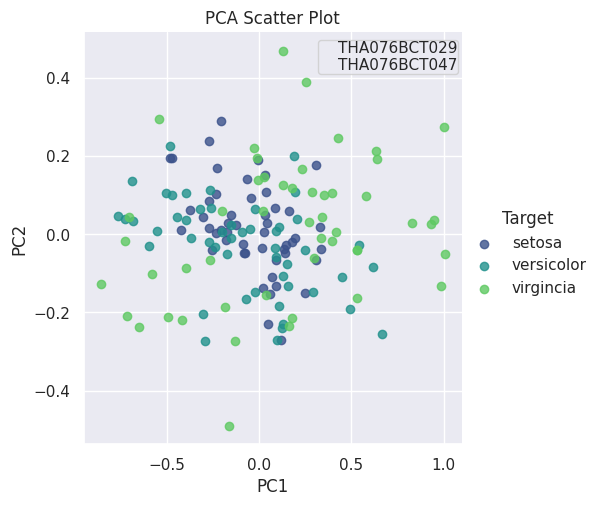

In [ ]:
#For 2 component
df = pd.DataFrame(data=new_transformed, columns=['PC1', 'PC2'])
y = pd.Series(data1.target)
y = y.replace(0, 'setosa')
y = y.replace(1, 'versicolor')
y = y.replace(2, 'virgincia')
df['Target'] = y

sn.set(style='darkgrid')  # Set the style to 'darkgrid' for a similar appearance

legend_handles = [
    plt.Line2D([], [], color='black', marker='o', markersize=10, label='THA076BCT029\nTHA076BCT047',alpha = 0), # Remove the scatterplot marker from the legend
]

sn.lmplot(x='PC1', y='PC2', data=df, hue='Target', fit_reg = False, palette='viridis', legend='full')  # Use scatterplot and add 'style' parameter
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(0.6, 1.0), ncol=len(legend_handles), handlelength=0.4, borderpad=0.07)
plt.title('PCA Scatter Plot')
plt.show()

In [ ]:
#Trying different combination
transform_component = eigenvectors.T[[1,3]]
transform_component.shape
new_transformed = X_std @ transform_component.T
new_transformed.shape

(150, 2)

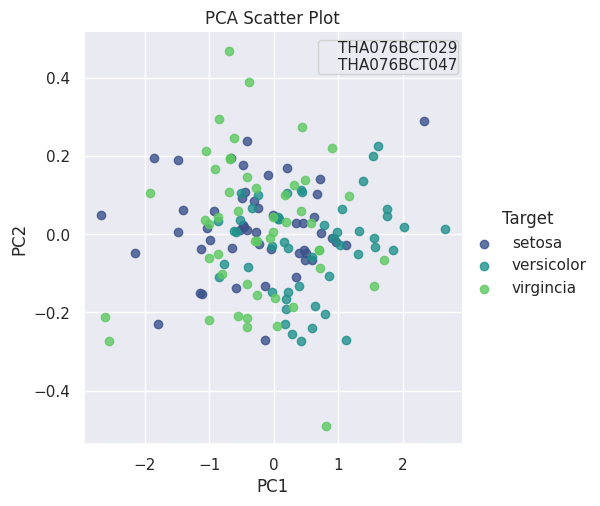

In [ ]:
#For 2 component
df = pd.DataFrame(data=new_transformed, columns=['PC1', 'PC2'])
y = pd.Series(data1.target)
y = y.replace(0, 'setosa')
y = y.replace(1, 'versicolor')
y = y.replace(2, 'virgincia')
df['Target'] = y

sn.set(style='darkgrid')  # Set the style to 'darkgrid' for a similar appearance

legend_handles = [
    plt.Line2D([], [], color='black', marker='o', markersize=10, label='THA076BCT029\nTHA076BCT047',alpha = 0), # Remove the scatterplot marker from the legend
]

sn.lmplot(x='PC1', y='PC2', data=df, hue='Target', fit_reg = False, palette='viridis', legend='full')  # Use scatterplot and add 'style' parameter
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(0.6, 1.0), ncol=len(legend_handles), handlelength=0.4, borderpad=0.07)
plt.title('PCA Scatter Plot')
plt.show()

In [ ]:
transform_component1 = eigenvectors.T[1]
transform_component1.shape
transform_component1

array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])

In [ ]:
new_transformed1 = X_std @ transform_component1.T
new_transformed1.shape

(150,)

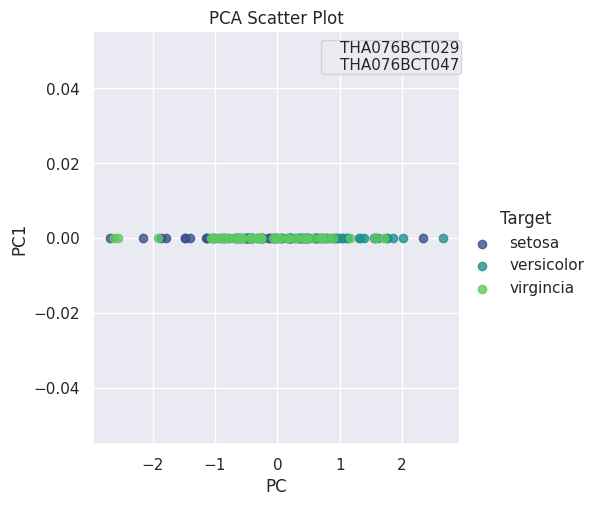

In [ ]:
#For 1 component
df = pd.DataFrame(data = new_transformed1, columns = ['PC'])
df['PC1'] = [0] * new_transformed1.shape[0]
y = pd.Series(data1.target)
y = y.replace(0, 'setosa')
y = y.replace(1, 'versicolor')
y = y.replace(2, 'virgincia')
df['Target'] = y
sn.set(style='darkgrid')  # Set the style to 'darkgrid' for a similar appearance

legend_handles = [
    plt.Line2D([], [], color='black', marker='o', markersize=10, label='THA076BCT029\nTHA076BCT047',alpha = 0), # Remove the scatterplot marker from the legend
]

sn.lmplot(x='PC', y='PC1', data=df, hue='Target', fit_reg = False, palette='viridis', legend='full')  # Use scatterplot and add 'style' parameter
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(0.6, 1.0), ncol=len(legend_handles), handlelength=0.4, borderpad=0.07)
plt.title('PCA Scatter Plot')
plt.show()

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Access the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Access the principal components
principal_components = pca.components_
print("Principal Components:\n", principal_components)

Explained Variance Ratio: [0.72962445 0.22850762]
Principal Components:
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]


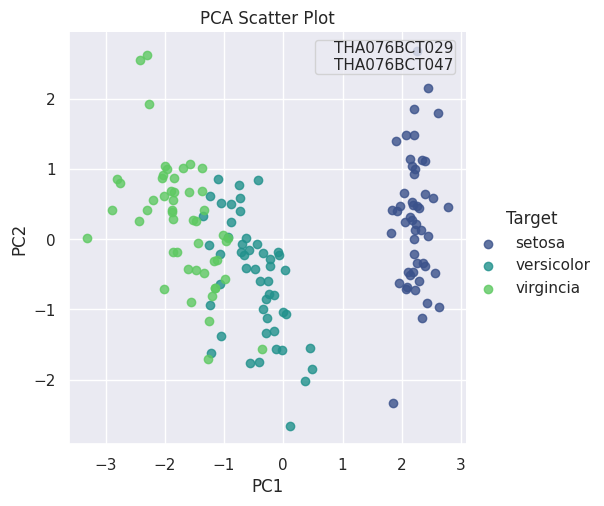

In [ ]:
#For 2 component
df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
df['PC1'] = -df['PC1']
y = pd.Series(data1.target)
y = y.replace(0, 'setosa')
y = y.replace(1, 'versicolor')
y = y.replace(2, 'virgincia')
df['Target'] = y
sn.set(style='darkgrid')  # Set the style to 'darkgrid' for a similar appearance

legend_handles = [
    plt.Line2D([], [], color='black', marker='o', markersize=10, label='THA076BCT029\nTHA076BCT047',alpha = 0), # Remove the scatterplot marker from the legend
]

sn.lmplot(x='PC1', y='PC2', data=df, hue='Target', fit_reg = False, palette='viridis', legend='full')  # Use scatterplot and add 'style' parameter
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(0.6, 1.0), ncol=len(legend_handles), handlelength=0.4, borderpad=0.07)
plt.title('PCA Scatter Plot')
plt.show()

In [ ]:
#Using built in function
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_std)

# Access the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Access the principal components
principal_components = pca.components_
print("Principal Components:\n", principal_components)

Explained Variance Ratio: [0.72962445]
Principal Components:
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]]


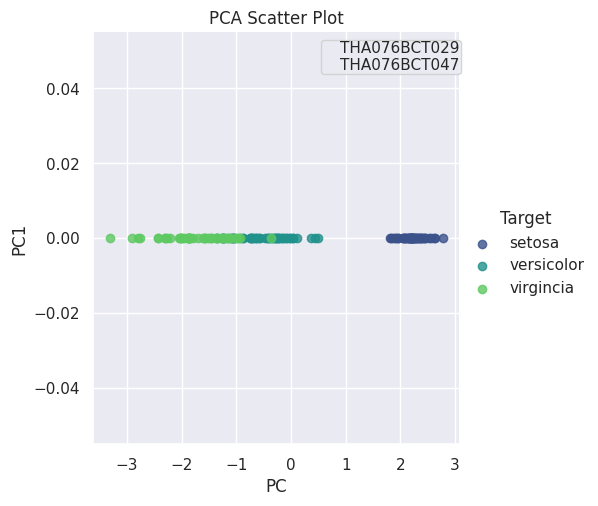

In [ ]:
#For 1 component
df = pd.DataFrame(data = X_pca, columns = ['PC'])
df['PC'] = -df['PC']
df['PC1'] = [0]*df.shape[0]
y = pd.Series(data1.target)
y = y.replace(0, 'setosa')
y = y.replace(1, 'versicolor')
y = y.replace(2, 'virgincia')
df['Target'] = y
sn.set(style='darkgrid')  # Set the style to 'darkgrid' for a similar appearance

legend_handles = [
    plt.Line2D([], [], color='black', marker='o', markersize=10, label='THA076BCT029\nTHA076BCT047',alpha = 0), # Remove the scatterplot marker from the legend
]

sn.lmplot(x='PC', y='PC1', data=df, hue= 'Target', fit_reg = False, palette='viridis', legend='full')  # Use scatterplot and add 'style' parameter
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(0.6, 1.0), ncol=len(legend_handles), handlelength=0.4, borderpad=0.07)
plt.title('PCA Scatter Plot')
plt.show()

In [ ]:
#For 3 component
transform_component = eigenvectors.T[0:3]
transform_component.shape
new_transformed = X_std @ transform_component.T
new_transformed.shape

(150, 3)

<ipython-input-33-3c2684e944a8>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')  # Set the colormap to 'viridis'
<ipython-input-33-3c2684e944a8>:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(df.loc[indices, 'PC1'], df.loc[indices, 'PC2'], df.loc[indices, 'PC3'], c=color, marker='o',label = target)


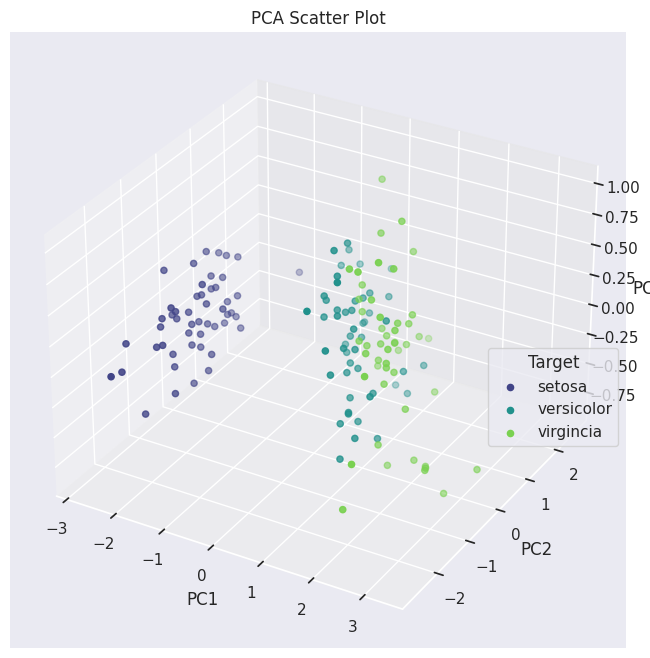

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
df = pd.DataFrame(data=new_transformed, columns=['PC1', 'PC2','PC3'])
y = pd.Series(data1.target)
y = y.replace(0, 'setosa')
y = y.replace(1, 'versicolor')
y = y.replace(2, 'virgincia')
df['Target'] = y
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sn.set(style='darkgrid')  # Set the style to 'darkgrid' for a similar appearance

legend_handles = [
    plt.Line2D([], [], color='black', marker='o', markersize=10, label='THA076BCT029\nTHA076BCT047', alpha=0)
]

cmap = cm.get_cmap('viridis')  # Set the colormap to 'viridis'
colors = {'setosa': cmap(0.2), 'versicolor': cmap(0.5), 'virgincia': cmap(0.8)}  # Assign colors from the colormap to categories

for target in df['Target'].unique():
    indices = df['Target'] == target
    color = colors[target]
    ax.scatter(df.loc[indices, 'PC1'], df.loc[indices, 'PC2'], df.loc[indices, 'PC3'], c=color, marker='o',label = target)

ax.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(0.6, 1.0), ncol=len(legend_handles), handlelength=0.4, borderpad=0.07)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA Scatter Plot')
legend = ax.legend()
legend.set_title('Target')
legend.set_bbox_to_anchor((1.0, 0.5))

plt.show()







In [ ]:
#Try different combination
transform_component = eigenvectors.T[[0,2,3]]
transform_component.shape
new_transformed = X_std @ transform_component.T
new_transformed.shape

(150, 3)

<ipython-input-35-3c2684e944a8>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')  # Set the colormap to 'viridis'
<ipython-input-35-3c2684e944a8>:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(df.loc[indices, 'PC1'], df.loc[indices, 'PC2'], df.loc[indices, 'PC3'], c=color, marker='o',label = target)


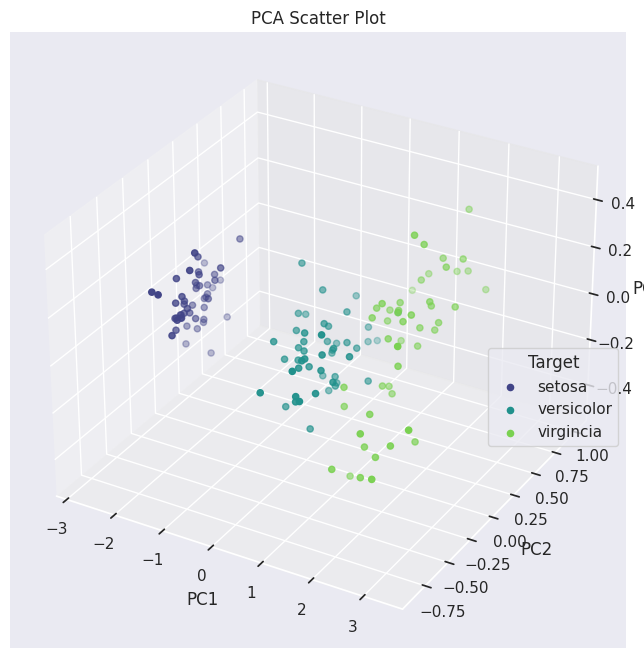

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
df = pd.DataFrame(data=new_transformed, columns=['PC1', 'PC2','PC3'])
y = pd.Series(data1.target)
y = y.replace(0, 'setosa')
y = y.replace(1, 'versicolor')
y = y.replace(2, 'virgincia')
df['Target'] = y
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sn.set(style='darkgrid')  # Set the style to 'darkgrid' for a similar appearance

legend_handles = [
    plt.Line2D([], [], color='black', marker='o', markersize=10, label='THA076BCT029\nTHA076BCT047', alpha=0)
]

cmap = cm.get_cmap('viridis')  # Set the colormap to 'viridis'
colors = {'setosa': cmap(0.2), 'versicolor': cmap(0.5), 'virgincia': cmap(0.8)}  # Assign colors from the colormap to categories

for target in df['Target'].unique():
    indices = df['Target'] == target
    color = colors[target]
    ax.scatter(df.loc[indices, 'PC1'], df.loc[indices, 'PC2'], df.loc[indices, 'PC3'], c=color, marker='o',label = target)

ax.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(0.6, 1.0), ncol=len(legend_handles), handlelength=0.4, borderpad=0.07)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA Scatter Plot')
legend = ax.legend()
legend.set_title('Target')
legend.set_bbox_to_anchor((1.0, 0.5))

plt.show()







In [ ]:
#Try different combination
transform_component = eigenvectors.T[1:]
transform_component.shape
new_transformed = X_std @ transform_component.T
new_transformed.shape

(150, 3)

<ipython-input-37-3c2684e944a8>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')  # Set the colormap to 'viridis'
<ipython-input-37-3c2684e944a8>:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(df.loc[indices, 'PC1'], df.loc[indices, 'PC2'], df.loc[indices, 'PC3'], c=color, marker='o',label = target)


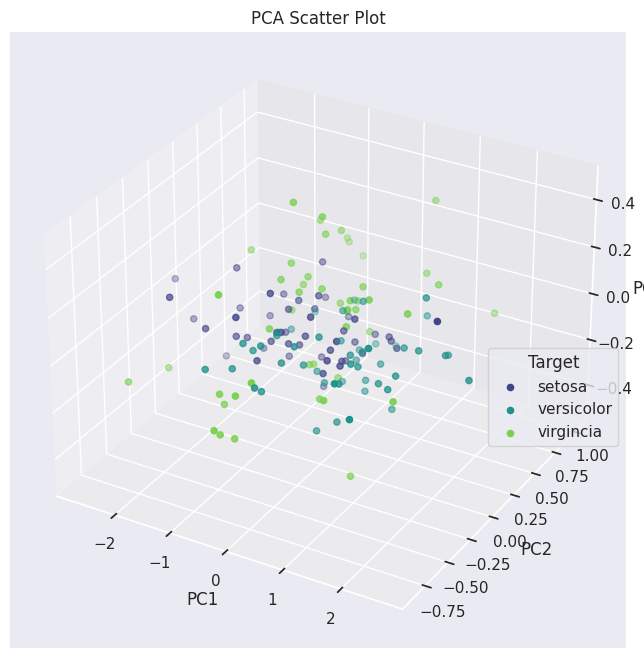

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
df = pd.DataFrame(data=new_transformed, columns=['PC1', 'PC2','PC3'])
y = pd.Series(data1.target)
y = y.replace(0, 'setosa')
y = y.replace(1, 'versicolor')
y = y.replace(2, 'virgincia')
df['Target'] = y
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sn.set(style='darkgrid')  # Set the style to 'darkgrid' for a similar appearance

legend_handles = [
    plt.Line2D([], [], color='black', marker='o', markersize=10, label='THA076BCT029\nTHA076BCT047', alpha=0)
]

cmap = cm.get_cmap('viridis')  # Set the colormap to 'viridis'
colors = {'setosa': cmap(0.2), 'versicolor': cmap(0.5), 'virgincia': cmap(0.8)}  # Assign colors from the colormap to categories

for target in df['Target'].unique():
    indices = df['Target'] == target
    color = colors[target]
    ax.scatter(df.loc[indices, 'PC1'], df.loc[indices, 'PC2'], df.loc[indices, 'PC3'], c=color, marker='o',label = target)

ax.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(0.6, 1.0), ncol=len(legend_handles), handlelength=0.4, borderpad=0.07)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA Scatter Plot')
legend = ax.legend()
legend.set_title('Target')
legend.set_bbox_to_anchor((1.0, 0.5))

plt.show()







In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()

# Convert the data and target into a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Display a small sample of examples from all three types of flowers
sample = df.groupby('target').apply(lambda x: x.sample(1)).reset_index(drop=True)
print(sample)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.7                1.5               0.4   
1                5.7               2.6                3.5               1.0   
2                6.5               3.0                5.2               2.0   

   target  
0       0  
1       1  
2       2  


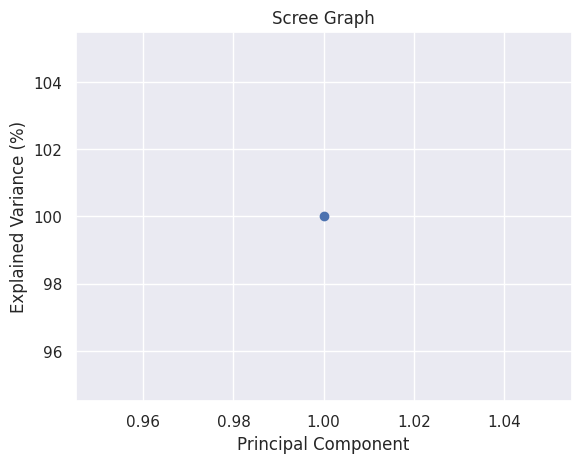

In [ ]:
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]

explained_variance = (pca.explained_variance_ / np.sum(pca.explained_variance_)) * 100

# Plot the scree graph
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.title('Scree Graph')
plt.show()